# Pandas API

This notebook scopes out the capacities of the `pandas` API. Here and there I insert comparable `seaborn` plots (`seaborn` is better for composition but `pandas` is often fine for smaller plots).

In [1]:
import pandas as pd
import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
%ls

 Volume in drive C is SSD_80GB
 Volume Serial Number is 9279-00B2

 Directory of C:\Users\Alex\Desktop\nyc-health-inspections

06/19/2016  02:57 PM    <DIR>          .
06/19/2016  02:57 PM    <DIR>          ..
06/17/2016  07:59 PM                82 .gitignore
06/18/2016  05:02 PM    <DIR>          .ipynb_checkpoints
06/17/2016  09:25 PM           419,403 big-box-plot.png
06/17/2016  07:59 PM           587,844 big-violin-plot.png
06/17/2016  08:08 PM       163,828,437 DOHMH_New_York_City_Restaurant_Inspection_Results.csv
05/22/2016  11:53 AM        14,261,259 nyc_building_sales.csv
06/19/2016  02:57 PM            73,706 pandas_api.ipynb
06/18/2016  05:44 PM         1,034,629 seaborn_api_box_violin.ipynb
06/18/2016  06:57 PM           326,693 seaborn_api_categorical.ipynb
06/18/2016  06:02 PM           697,469 seaborn_api_model_fitting.ipynb
06/18/2016  02:08 PM         1,306,415 seaborn_api_multivariate.ipynb
              10 File(s)    182,535,937 bytes
               3 Dir(s)  11,617,

In [4]:
sales = pd.read_csv("nyc_building_sales.csv")

C:\Users\Alex\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (23,26,28,29,70,71,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pd.set_option("max_columns", 500)

In [6]:
sales.head(1)

,Unnamed: 0,Index,Borough,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt,ValueRatio
0,0,0,Bronx,2268,18,1800000,2500,221.538462,201,41,1002,7,8,10454,E083,40,4500,2,1,2A,532 EAST 142 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R6,NaN,N,C1,2,0,P,"HAXHARI, GAC",2500,8125,0,8125,0,0,0,0,0,0,2,1,4,7,7,25,100,0,0,NaN,2,N,5,2,2197,216878,0,0,2015,NaN,0,0,NaN,NaN,3.25,2.43,0,4.8,2,2022680018,0,41,1007305,234328,6a,NaN,209S029,20901,NaN,0,NaN,1,16v1,143700,620769,2035,0.250462,17.686154,76.402338,2.899629


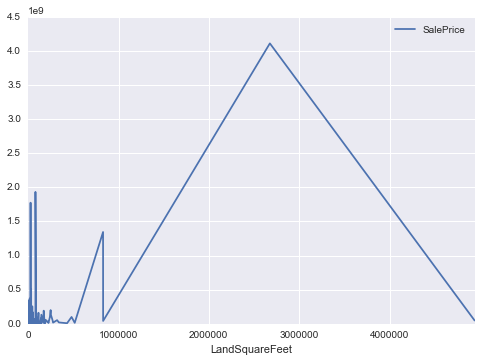

In [7]:
sales[['LandSquareFeet', 'SalePrice']].sort_values(by='LandSquareFeet').plot(x='LandSquareFeet', y='SalePrice')

## Bar chart

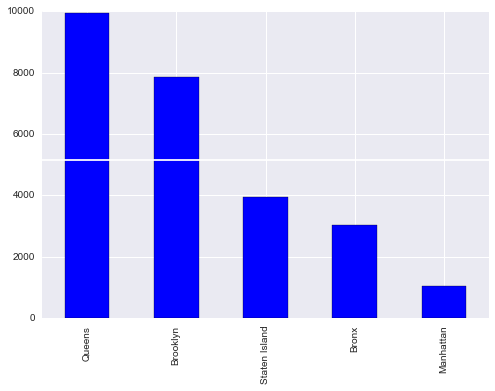

In [8]:
sales['Borough'].value_counts().plot.bar()
plt.axhline(np.mean(sales['Borough'].value_counts().values), color='w')

In [9]:
num_index = sales.groupby('Borough').count()['Index'].sort_values(ascending=False).index

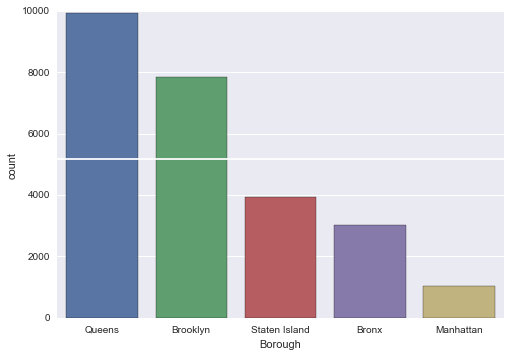

In [10]:
sns.countplot(x='Borough', data=sales, order=num_index)
plt.axhline(np.mean(sales['Borough'].value_counts().values), color='w')

`seaborn` doesn't sort the bars any particular way by default, you have to specify that manually using `order`, which requires computing that information&mdash;rather burdensome.

## Multi-bar bar chart

To plot a multi-line bar chart `pandas` input needs to be reshaped into the proper format.

First let's create a dummy variable that's interesting to look at.

In [11]:
owner_dummy = sales[sales['SalePrice'] < 1*10**9].copy()
owner_dummy['P/NP'] = (owner_dummy['OwnerType'] == 'P').replace(True, "P").replace(False, "NP")

I do the view in two different ways.

First way, manually using `groupby`.

In [64]:
owner_dummy[['Borough', 'P/NP', 'OwnerType']].groupby(['Borough', 'P/NP']).count().unstack('P/NP')

OwnerType      
P/NP                 NP     P
Borough                      
Bronx                10   430
Brooklyn             16  1084
Manhattan            10   389
Queens               26   495
Staten Island         9   140

In [65]:
_.columns.get_level_values(1)

Index(['NP', 'P'], dtype='object', name='P/NP')

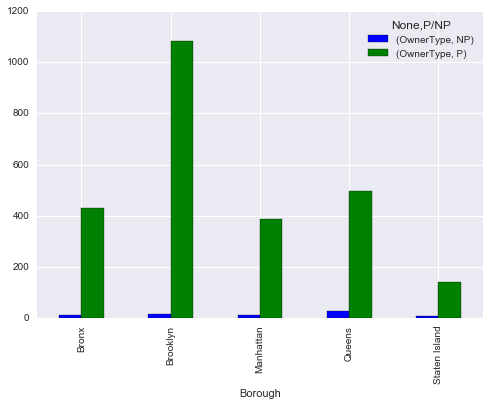

In [49]:
_.plot.bar()

Then using `pivot_table`, which does the same thing&mdash;almost. It does it a little more clearly because the `OwnerName` dummy is not instantiated as a multi-level column index.

FYI you can correct that annoyance in the `groupby` go-around using:

    _.columns = _.columns.get_level_values(1)

In [70]:
owner_dummy.pivot_table('OwnerName', index='Borough', columns='P/NP', aggfunc=pd.Series.count)

P/NP,NP,P
Borough,,
Bronx,2578,430
Brooklyn,6765,1084
Manhattan,658,389
Queens,9425,495
Staten Island,3805,140


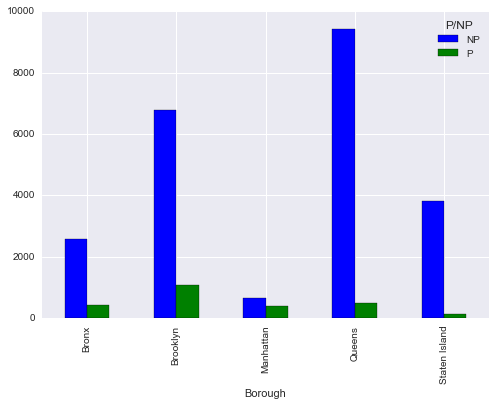

In [59]:
_.plot.bar()

`crosstab` currys `pivot_table` to make this aggregation a teensy bit easier to write:

In [71]:
pd.crosstab(owner_dummy['Borough'], owner_dummy['P/NP'])

P/NP,NP,P
Borough,,
Bronx,2593,430
Brooklyn,6766,1084
Manhattan,658,389
Queens,9444,495
Staten Island,3811,140


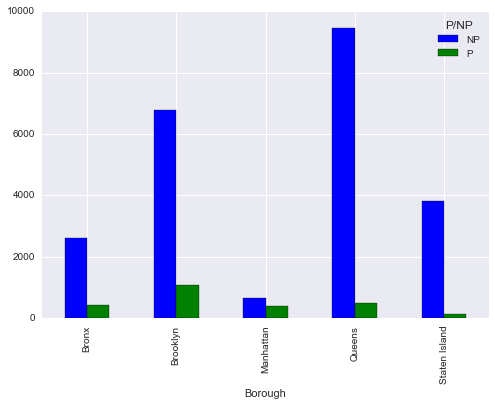

In [73]:
_.plot.bar()

This is all a *lot* easier in `seaborn`.

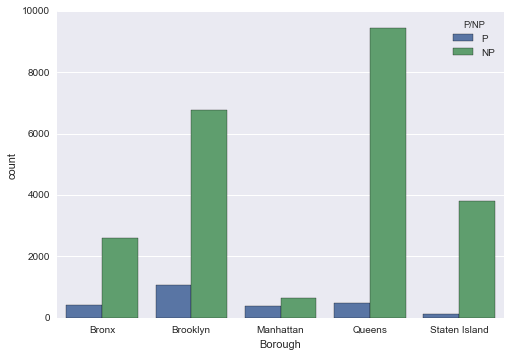

In [76]:
sns.countplot(x='Borough', hue='P/NP', data=owner_dummy)

`seaborn` makes a slightly weird distinction between `countplot` (what one would classically think of as a bar chart) and `barplot` (an aggregate-function chart not necessarily beholden to `pandas.Series.count`).

## Stacked bar chart

The `pandas` semantics are all the same, the only thing that changes is passing a `stacked=True` argument:

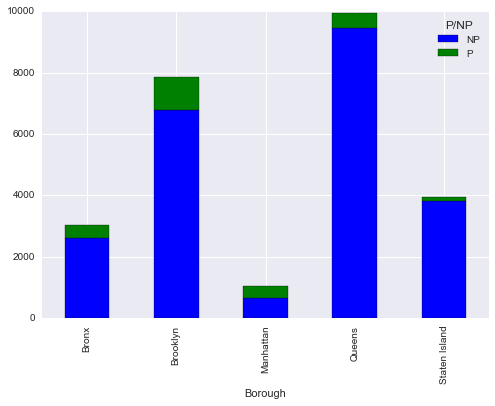

In [77]:
pd.crosstab(owner_dummy['Borough'], owner_dummy['P/NP']).plot.bar(stacked=True)

`seaborn` doesn't do stacked bar charts. If you really want it you can force the issue, see [this blog post](http://randyzwitch.com/creating-stacked-bar-chart-seaborn/), but it's not worthwhile, just use `pandas` for these.

## Horizontal bar chart

`pandas` defines a `barh` for these.

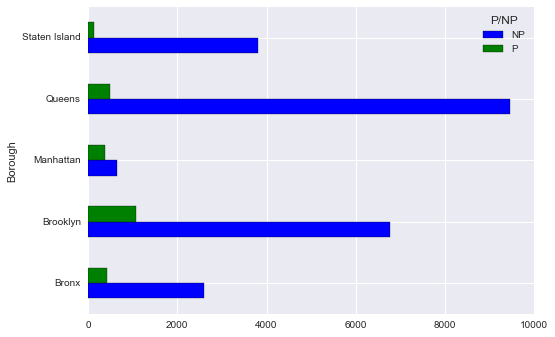

In [78]:
pd.crosstab(owner_dummy['Borough'], owner_dummy['P/NP']).plot.barh()

In `seaborn` you just change `x` to `y`.

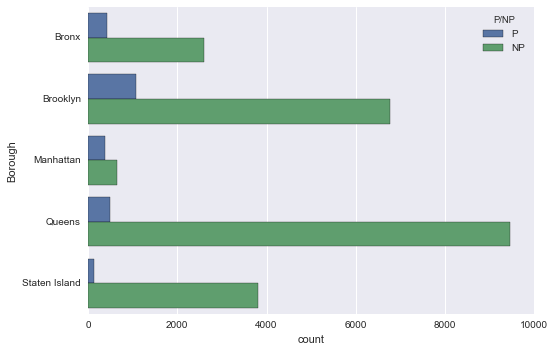

In [79]:
sns.countplot(y='Borough', hue='P/NP', data=owner_dummy)

K.

## Aggregated bar chart

These are bar charts using some sort of statistical aggregator besides `pd.Series.count`, e.g. (`np.mean`, `np.median`, etc.). Only `seaborn` has these.

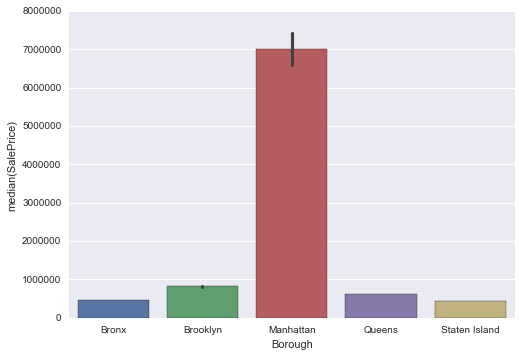

In [84]:
sns.barplot(data=owner_dummy, x='Borough', y='SalePrice', estimator=np.median)

`seaborn` also does small multiples, though I haven't explored that very heavily yet.

## Simple histogram

Easy to do in `pandas`.

In [97]:
small_owner_dummy = owner_dummy[owner_dummy['SalePrice'] < 1*10**6]

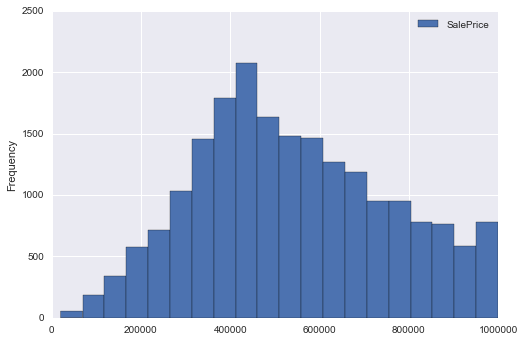

In [151]:
small_owner_dummy[['SalePrice']].plot.hist(bins=20)

Easy to do in `seaborn`, with the added benefit that you can add a rugplot or fit a KDE or any other distribution on top, so `seaborn` is much more powerful here.

Note that the KDE does reliably screw up the axis it's on.

C:\Users\Alex\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


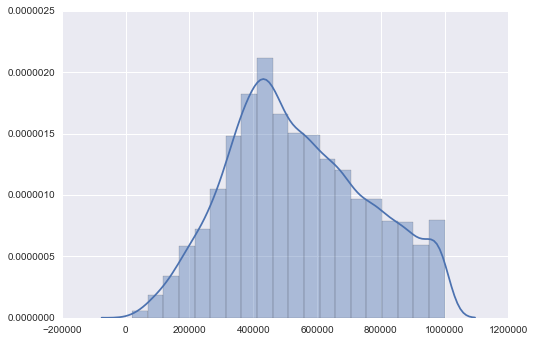

In [150]:
sns.distplot(small_owner_dummy[['SalePrice']], bins=20)

Note that both of these methods are touch-ups of `matplotlib.pyplot.hist`.

## Stacked histogram

The canonical example in `pandas` is once again observation-based.

In [117]:
pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000), 'c': np.random.randn(1000) - 1},
             columns=['a', 'b', 'c'])

,a,b,c
0,-0.616206,1.894457,0.003235
1,1.095723,-0.567418,0.104186
2,0.990704,-0.491982,-1.818339
3,0.567149,0.063483,-0.463576
4,-0.853387,-0.131489,-0.393638
5,0.969431,0.950628,-1.464676
6,0.439998,0.829403,0.291374
7,1.717504,-0.147075,-1.029949
8,1.836550,-0.733489,-1.140514
9,2.622712,1.812765,-1.435949


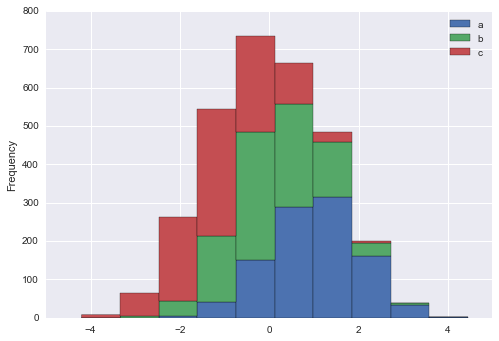

In [118]:
_.plot.hist(stacked=True)

You can use `pivot` or, as I've gotten used to `set_index()` and `unstack()` to reshape the data into this format.

In [161]:
d = small_owner_dummy[['SalePrice', 'P/NP']].set_index([small_owner_dummy.index, 'P/NP']).unstack('P/NP')

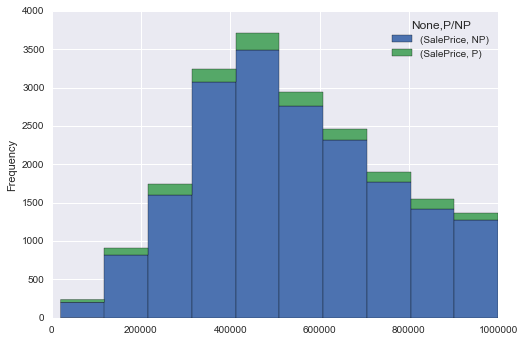

In [162]:
d.plot.hist(stacked=True)

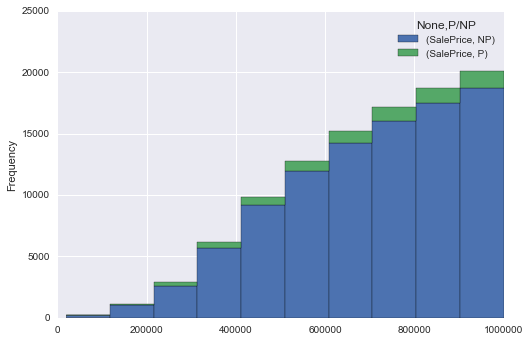

In [165]:
d.plot.hist(stacked=True, cumulative=True)

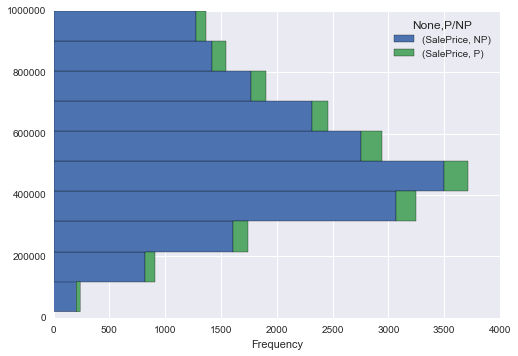

In [167]:
d.plot.hist(stacked=True, orientation='horizontal')

The issue with the useless multi-level columnular index is the same as it was in the bar chart examples, and the solution is again the same, actually use `pivot()` or use the following:

    _.columns = _.columns.get_level_values(1)
    
`seaborn` doesn't do this fancy stacking stuff...man.